In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
customers = pd.read_csv(r"C:\Users\91976\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\91976\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\91976\Downloads\Transactions.csv")


In [3]:
# Display first few rows of each dataset
print("Customers Dataset:")
print(customers.head(), "\n")

print("Products Dataset:")
print(products.head(), "\n")

print("Transactions Dataset:")
print(transactions.head(), "\n")



Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166 

In [4]:
# Basic information about the datasets
print("\nCustomers Info:\n")
print(customers.info())
print("\nProducts Info:\n")
print(products.info())
print("\nTransactions Info:\n")
print(transactions.info())




Customers Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-

In [5]:
# Check for missing values
print("\nMissing Values in Customers Dataset:\n")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:\n")
print(products.isnull().sum())
print("\nMissing Values in Transactions Dataset:\n")
print(transactions.isnull().sum())




Missing Values in Customers Dataset:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Dataset:

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Merging datasets for comprehensive analysis
merged_data = pd.merge(transactions, products, on='ProductID', how='inner')
merged_data = pd.merge(merged_data, customers, on='CustomerID', how='inner')



In [7]:
# Display the first few rows of the merged dataset
print("\nMerged Dataset:\n")
print(merged_data.head())




Merged Dataset:

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins  

In [8]:
# Summary statistics
print("\nSummary Statistics of Merged Dataset:\n")
print(merged_data.describe())



Summary Statistics of Merged Dataset:

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


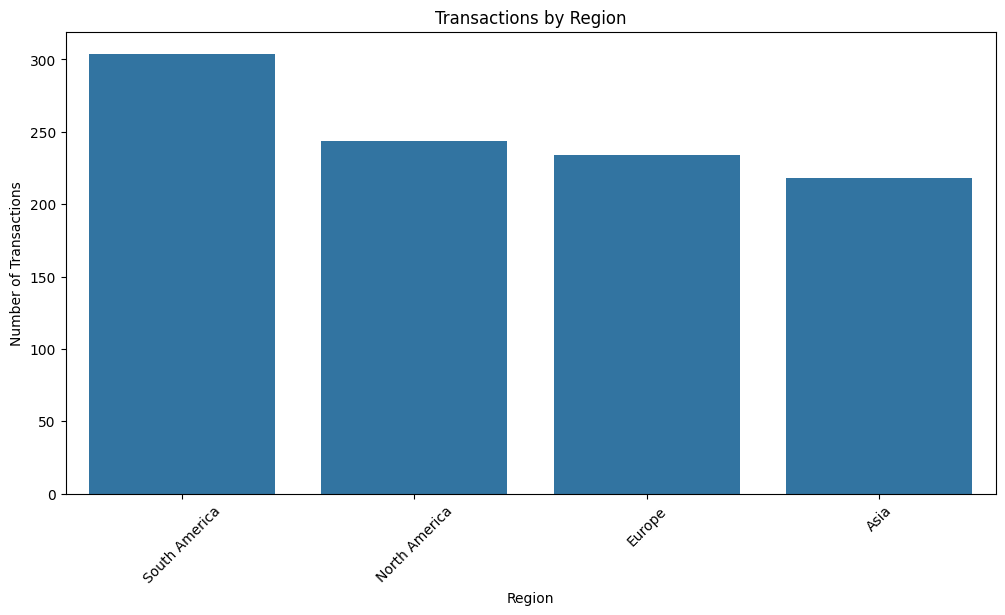

In [9]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='Region', order=merged_data['Region'].value_counts().index)
plt.title("Transactions by Region")
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()



C:\Users\91976\AppData\Local\Temp\ipykernel_19428\3728675688.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data, x='Category', y='TotalValue', estimator=sum, ci=None, order=merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).index)


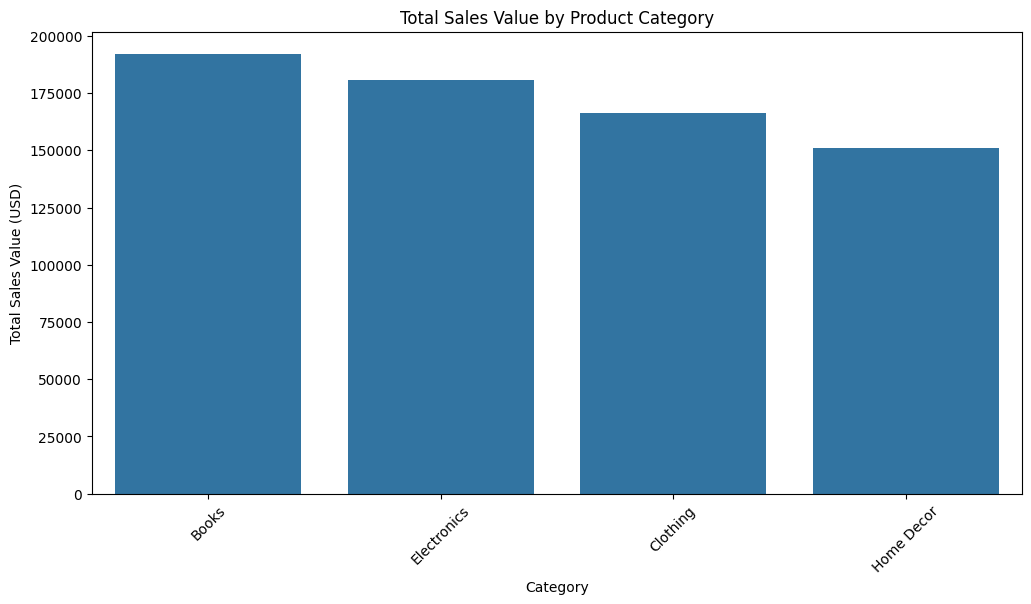

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='Category', y='TotalValue', estimator=sum, ci=None, order=merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).index)
plt.title("Total Sales Value by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales Value (USD)")
plt.xticks(rotation=45)
plt.show()


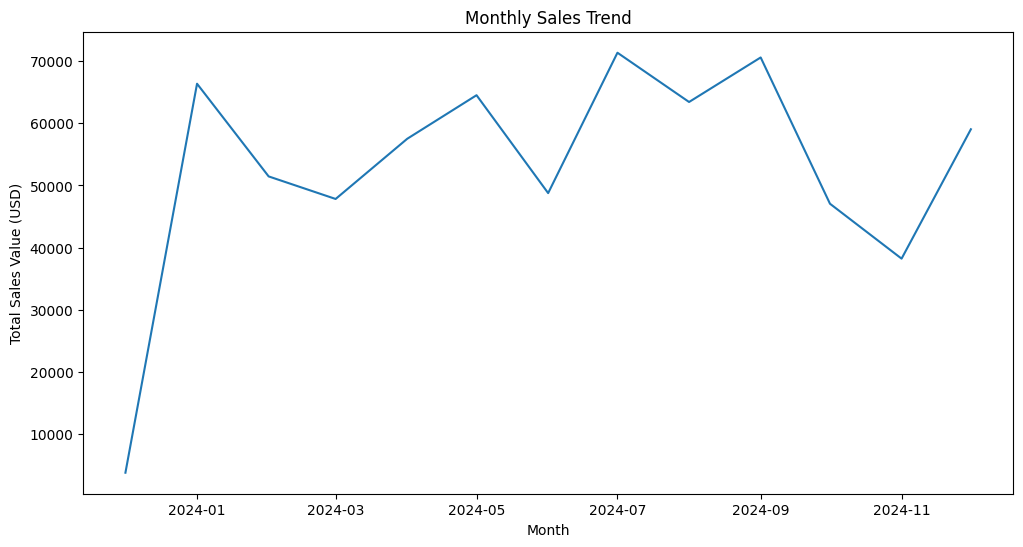

In [11]:
plt.figure(figsize=(12, 6))
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).agg({'TotalValue': 'sum'}).reset_index()
monthly_sales['TransactionDate'] = monthly_sales['TransactionDate'].dt.to_timestamp()
sns.lineplot(data=monthly_sales, x='TransactionDate', y='TotalValue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (USD)")
plt.show()